#### Module 24 - Hyperparameter Tuning

## Module Overview

In this module, you will expand your knowledge of hyperparameters and explore methods for hyperparameter tuning as well as some of the challenges associated with it.

## Learning outcomes

- LO 1: Define the challenges in hyperparameter tuning.
- LO 2: Identify the consequences of having bad hyperparameters
- LO 3: Describe the methods for hyperparameter tuning and appropriate use cases.
- LO 4: Synthesise key contributions from current literature on hyperparameter tuning.
- LO 5: Brainstorm new ideas for hyperparameter tuning and justify those ideas.

## Misc and Keywords

#### Non-Stationarity

In machine learning, **non-stationarity** refers to changes in the data distribution or model behavior over time or across different conditions. In the context of hyperparameter tuning, this means that the optimal hyperparameters may vary during training or between tasks. For example, a learning rate that works well early in training might not be optimal later on.

Non-stationarity makes it challenging to find fixed hyperparameters that perform well in all situations. Adaptive methods such as learning rate schedules or online learning techniques are often used to address this.

#### Heteroscedasticity

**Heteroscedasticity** refers to the presence of non-constant variance in a model’s output or performance. In hyperparameter tuning, this means that the performance of a model (e.g., accuracy or loss) can vary more for some hyperparameter values than others.

For example, a very high learning rate might result in highly variable model performance across training runs, whereas a moderate learning rate might produce more stable results. Bayesian optimisation can account for heteroscedasticity by using models that allow varying levels of uncertainty across the hyperparameter space.

## Module Summary Description



# Hyperparameters

*Hyperparameters* are parameters whose values control the learning process, they include variables such as the *learning rate*, *weight decay*, *number of layers*, and *choice of activation function*, among others. These parameters directly affect both the speed and quality of the learning process, making the selection of optimal hyperparameters a critical task.

However, tuning hyperparameters is challenging for several reasons:

- There are many hyperparameters to consider.
- Deep learning models can be time-consuming to train, making exhaustive evaluation of all combinations infeasible.
- Some hyperparameters may be conditionally dependent on others.
- The search space may contain multiple local optima, making local optimisation methods like gradient descent unsuitable.

Because of these challenges, global optimisation techniques such as **Bayesian optimisation** are often used for more effective hyperparameter tuning.


#### Learning rate as an example:

If the learning rate is too small, it can fail to converge in the training time as shown in Figure 1 on the left. If it is too large, it will completely diverge and never get to the correct solution as shown in Figure 2 on the right. There is no easy way to know in advance what the learning rate should be; therefore, in machine learning, it’s common for practitioners to rely on expert knowledge and trial and error to determine what the learning rate should be.

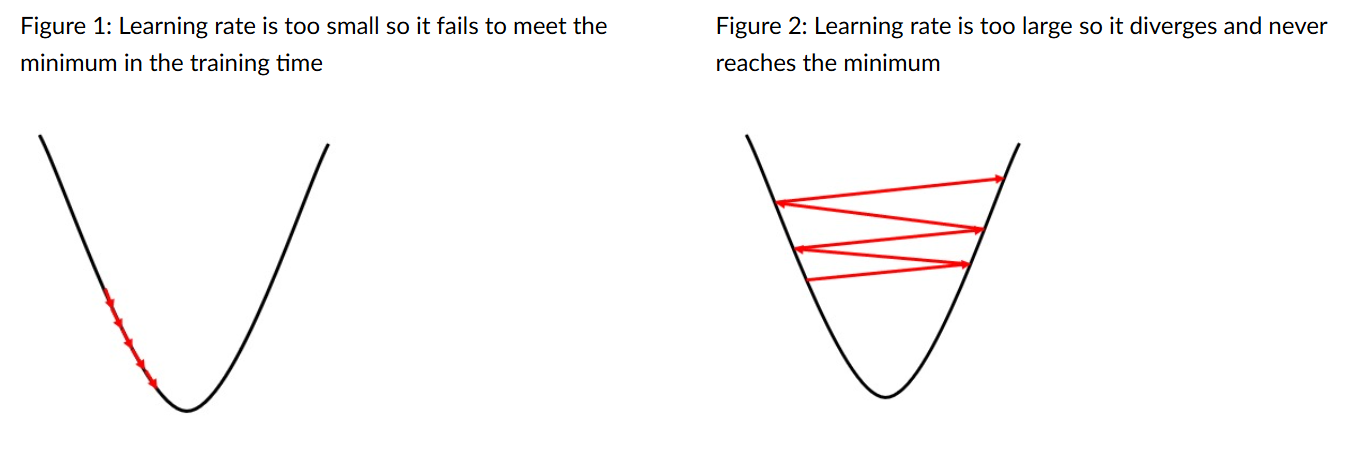


### Methods for hyperparameter tuning

Several approaches exist for tuning hyperparameters:

- **Handcrafted Search**
  - Parameters are selected manually by an expert.
  - Relies on intuition and domain knowledge.

- **Grid Search**
  - Discretises the range of possible values for each hyperparameter.
  - Exhaustively evaluates all combinations.
  - Easily parallelisable.
  - Computationally expensive and inefficient in high-dimensional spaces.

- **Random Search**
  - Samples a random subset of the hyperparameter space.
  - Also discretises values but explores fewer combinations.
  - Easily parallelisable.
  - More efficient than grid search in many cases, but may miss the best solution.

- **Bayesian Optimisation**
  - Uses a probabilistic surrogate model, $M$, to approximate the true (black-box) objective function, $f$.
  - Selects hyperparameters that are likely to yield the best results based on the surrogate model.
  - More sample-efficient than random or grid search.
  - Especially useful when function evaluations (i.e., training models) are expensive.

### State-of-the-art methods for hyperparameter tuning

Hyperparameter optimisation remains a critical component in the development of high-performing machine learning models. Traditional methods such as grid search and random search are still used due to their simplicity and ease of implementation, but more sophisticated approaches are now commonly employed to address the complexity and computational cost associated with tuning deep learning models.

One of the most prominent techniques in the current state of the art is **Bayesian optimisation**. This approach models the performance of hyperparameter configurations as a probabilistic function and uses acquisition functions to balance exploration and exploitation of the search space. Gaussian processes are often used as surrogate models, though other methods such as random forests and neural networks have also been applied for scalability.

A significant advancement in recent years is the use of **batch (or parallel) Bayesian optimisation**, which allows multiple configurations to be evaluated simultaneously. This is especially important in large-scale or distributed systems where evaluating one configuration at a time would be prohibitively slow. Batch optimisation introduces additional complexity, such as the need to model correlations between simultaneous evaluations, but modern techniques—such as Thompson sampling and local penalisation—have been developed to handle these challenges effectively.

In batch optimisation, where multiple hyperparameter configurations are submitted simultaneously before receiving any feedback, various strategies are employed to effectively select the batch while accounting for uncertainty and redundancy. Key methods include:

- **Constant Liar Method**: This approach assumes a placeholder (or "lie") value for each selected point in the batch while the surrogate model selects the remaining points. The "lie" is often the predicted mean, worst-case, or best-case value of the surrogate model. This enables sequential selection of batch points with minimal model retraining.

- **Local Penalisation**: This method modifies the acquisition function to penalise regions around already-selected batch points, encouraging diversity and reducing redundancy within the batch. It does so by expanding exclusion zones around selected points based on the model’s uncertainty.

- **Thompson Sampling**: This technique involves sampling multiple functions from the posterior distribution of the surrogate model and optimising each independently to obtain batch members. It is particularly useful when using scalable surrogate models such as Bayesian neural networks.

These batch strategies are crucial for parallelising the evaluation process in environments such as high-performance computing clusters or cloud-based training platforms. They significantly reduce overall optimisation time, especially when individual model training is expensive. However, they must balance exploration and exploitation while ensuring that batch members are sufficiently diverse to make efficient use of resources.


Other noteworthy trends include:

- **Multi-fidelity optimisation**, where cheap approximations (e.g., fewer training epochs or subsampled data) are used to estimate performance, speeding up the search process.
- **Hyperband and BOHB**, which combine random search with early stopping to allocate resources more efficiently.
- **Meta-learning**, where knowledge from previous tasks is leveraged to guide hyperparameter tuning on new tasks.
- **Neural architecture search (NAS)**, which integrates hyperparameter and model architecture optimisation using similar strategies.

As the field evolves, the focus continues to shift towards methods that are both computationally efficient and capable of handling complex, high-dimensional, and noisy optimisation landscapes.
